<a href="https://colab.research.google.com/github/CEOApplepine/mega-data-engineering-project/blob/main/03.Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-11-22 20:54:08--  https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321 [text/csv]
Saving to: ‘taxi_cleaned.csv’

taxi_cleaned.csv    100%[===================>]     321  --.-KB/s    in 0s      

2025-11-22 20:54:08 (172 MB/s) - ‘taxi_cleaned.csv’ saved [321/321]

--2025-11-22 20:54:08--  https://people.sc.fsu.edu/~jburkardt/data/csv/addresses.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328 [text/csv]
Saving to: ‘retail_cleaned.csv’

retail_cleaned.csv  100%[===================>]     328  --.-KB/s    in 0s      

2025-11-22 20:54:09 (320 MB/s) - ‘retail_cleaned.csv’ saved [328/328]

Taxi Dataset Sample:
  Month

/tmp/ipython-input-563743951.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total', data=taxi_df, palette="Blues_d")


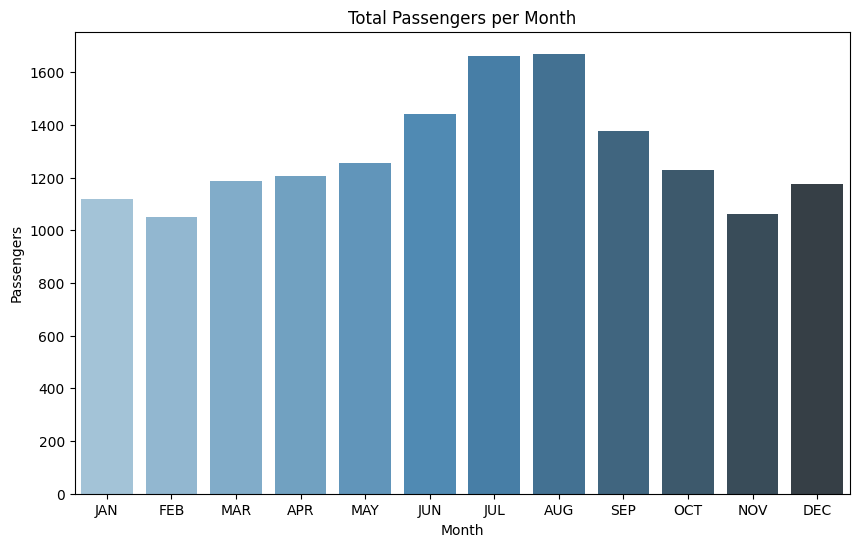

/tmp/ipython-input-563743951.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=retail_df.columns[0], data=retail_df, palette="Oranges_d")


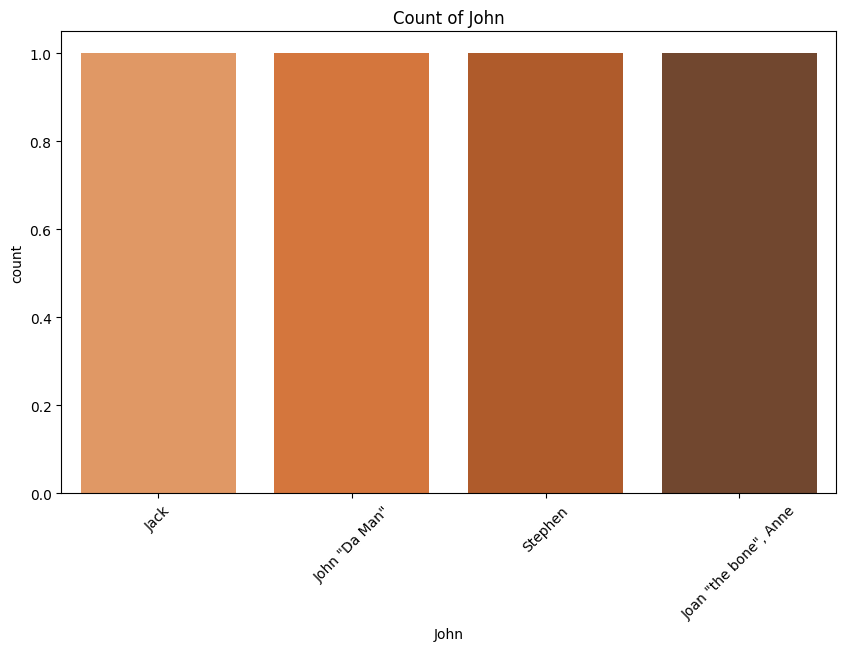

Dashboard figures saved locally in Colab.


<Figure size 640x480 with 0 Axes>

In [1]:
# ===========================
# 03_Dashboard.ipynb - Colab-ready
# ===========================

# Step 1: Install required packages
!pip install pandas matplotlib seaborn plotly --quiet

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 3: Load cleaned datasets from previous notebook
# (Ensure these files exist from 02_BigData.ipynb or download again)
!wget -O taxi_cleaned.csv https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv
!wget -O retail_cleaned.csv https://people.sc.fsu.edu/~jburkardt/data/csv/addresses.csv

taxi_df = pd.read_csv("taxi_cleaned.csv")
retail_df = pd.read_csv("retail_cleaned.csv")

# Step 4: Explore the datasets
print("Taxi Dataset Sample:")
print(taxi_df.head())

print("Retail Dataset Sample:")
print(retail_df.head())

# Step 5: Basic Statistics
print("Taxi Dataset Info:")
print(taxi_df.info())
print("Taxi Dataset Description:")
print(taxi_df.describe())

print("Retail Dataset Info:")
print(retail_df.info())
print("Retail Dataset Description:")
print(retail_df.describe())

# Step 6: Visualizations - Taxi Dataset

# Convert month columns to numeric if not already
month_cols = taxi_df.columns[1:]
for col_name in month_cols:
    taxi_df[col_name] = pd.to_numeric(taxi_df[col_name], errors='coerce')

# Plot passengers per month
taxi_df['Total'] = taxi_df[month_cols].sum(axis=1)
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Total', data=taxi_df, palette="Blues_d")
plt.title("Total Passengers per Month")
plt.ylabel("Passengers")
plt.xlabel("Month")
plt.show()

# Step 7: Visualizations - Retail Dataset

# Example: Count occurrences by first column
plt.figure(figsize=(10,6))
sns.countplot(x=retail_df.columns[0], data=retail_df, palette="Oranges_d")
plt.title(f"Count of {retail_df.columns[0]}")
plt.xticks(rotation=45)
plt.show()

# Step 8: Interactive Plot with Plotly (Taxi Dataset)
fig = px.line(taxi_df, x='Month', y=month_cols, title='Monthly Passengers Trend')
fig.show()

# Step 9: Optional - Save dashboard figures locally
plt.savefig("taxi_passengers.png")
plt.savefig("retail_count.png")
print("Dashboard figures saved locally in Colab.")